## Geophysical Data Analysis: Discrete Inverse Theory
### William Menke
Third Edition  
Transcribed and translated (from Matlab to Python) by Joshua Poirier

## Chapter Three
# Solution of the linear, Gaussian inverse problem, Viewpoint 1: The length method

### 3.1 The lengths estimates

The simplest of methods for solving the linear inverse problem **Gm=d** is based on measures of the size, or length, of the estimated model parameters $\mathbf{m}^{\text{est}}$ and of the predicted data $\mathbf{d}^{\text{pre}}=\mathbf{Gm}^{\text{est}}$.  

To see that measures of length can be relevant to the solution of inverse problems, consider the simple problem of fitting a straight line to data.  This problem is often solved by the so-called method of least squares.  In this method, one tries to pick the model parameters (intercept and slope) so that the predicted data are as close as possible to the observed data.  For each observation, one defines a prediction error, or misfit, $e_i=d_i^{\text{obs}}-d_i^{\text{pre}}$.  The best-fit line is then the one with model parameters that lead to the smallest overall error *E*, defined as  

\begin{equation*}
E = \sum_{i=1}^N e_i^2 = \mathbf{e}^{\text{T}} \mathbf{e}
\end{equation*}  

The total error *E* (the sum of the squares of the individual errors) is exactly the squared Euclidean length of the vector **e**, or $E = \mathbf{e}^{\text{T}} \mathbf{e}$.  

The method of least squares estimates the solution of an inverse problem by finding the model parameters that minimize a particular measure of the length of the prediction error, $\mathbf{e} = \mathbf{d}^{\text{obs}}-\mathbf{d}^{\text{pre}}$, namely, its Euclidean length.  As will be detailed below, it is the simplest of the methods that use measures of length as the guiding principle in solving an inverse problem.  

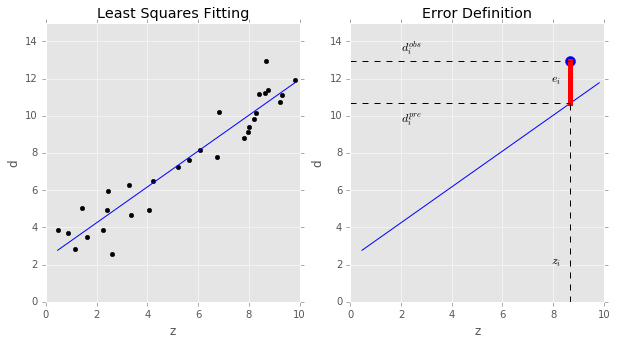

In [1]:
# least squares fit of synthetic data

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# simulate independent variable
z = np.sort(np.random.uniform(0, 10, 30))

# simulate dependent/observed variable
# d = a + b*z + noise
dobs = 2.0 + 1.0 * z + np.random.normal(0,1.0,30)

# least squares fit
M = 2
G = np.array([np.ones(30), z])
mest = inv(G.dot(np.transpose(G))).dot(G.reshape(2,30).dot(dobs)).reshape(2,1)

# predicted data & error
dpre = np.transpose(G).dot(mest)
e = dobs - dpre

# maximum error
iemax = abs(e).argmax()
emax = np.max(abs(e))

# build figure
plt.subplots(1,2, figsize=(10,5))

# PLOT 1: Simulated data and least squares solution
plt.subplot(121)

# simulated data
plt.scatter(z, dobs, color="black")

# least squares solution
plt.plot(z, dpre, color="blue")

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Least Squares Fitting')
plt.xlabel('z')
plt.ylabel('d')

# PLOT 2: Least squares solution demonstrating error as difference between observed and predicted datum
ax = plt.subplot(122)

# least squares solution
plt.plot(z, dpre, color="blue")

# annotating lines
plt.plot([z[iemax], z[iemax]], [dpre[iemax], dobs[iemax]], color="red", lw=5)
plt.plot([z[iemax], z[iemax]], [0,dpre[iemax]], color="black", ls='dashed')
plt.plot([0, z[iemax]], [dpre[iemax], dpre[iemax]], color="black", ls='dashed')
plt.plot([0, z[iemax]], [dobs[iemax], dobs[iemax]], color="black", ls='dashed')
plt.scatter([z[iemax]], [dobs[iemax]], color="blue", s=100)
ax.text(z[iemax]-0.75, (dobs[iemax]+dpre[iemax])/2, '$e_i$', fontsize=12)
ax.text(2, dobs[iemax]+0.5, '$d_i^{obs}$', fontsize=12)
ax.text(2, dpre[iemax]-1, '$d_i^{pre}$', fontsize=12)
ax.text(z[iemax]-0.75, 2, '$z_i$', fontsize=12)

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Error Definition')
plt.xlabel('z')
plt.ylabel('d')

### 3.2 Measures of length  

Note that although the Euclidean length is one way of quantifying the size or length of a vector, it is by no means the only possible measure.  For instance, one could equally well quantify length by summing the absolute values of the elements of a vector.  

The term *norm* is used to refer to some measure of length or size and is indicated by a set of double vertical bars; that is, ||**e**|| is the norm of the vector **e**.  The most commonly employed norms are those based on the sum of some power of the elements of a vector and are given the name $L_n$, where *n* is the power.  

\begin{equation*}
L_1 \: \text{norm:} \qquad \| \mathbf{e} \|_1 = \left[ \sum_i \left| e_i \right|^1 \right] \\
L_2 \: \text{norm:} \qquad \| \mathbf{e} \|_2 = \left[ \sum_i \left| e_i \right|^2 \right]^{1/2} \\
L_n \: \text{norm:} \qquad \| \mathbf{e} \|_n = \left[ \sum_i \left| e_i \right|^n \right]^{1/n} \\
\end{equation*}  

Successively higher norms give the largest element of **e** successively larger weight.  The limiting case of $n \rightarrow \infty$ gives nonzero weight to only the largest element; therefore, it is equivalent to the selection of the vector element with largest absolute value as the measure of length and is written as  

\begin{equation*}
L_\infty \: \text{norm:} \qquad \| \mathbf{e} \|_\infty = \max_i \left| e_i \right|
\end{equation*}  

The method of least squares uses teh $L_2$ norm to quantify length.  It is appropriate to inquire why this, and not some other choice of norm, is used.  The answer involves the way in which one chooses to weight data *outliers* that fall far from the average trend.  If the data are very accurate, then the fact that one prediction falls far from its observed value is important.  A high-order norm is used, since it weights the larger errors preferentially.  On the other hand, if the data are expected to scatter widely about the trend, then no significance can be placed upon a few large prediction errors.  A low-order norm is used, since it gives more equal weight to errors of different sizes.  

Norms
 E1: 16.1901320104 E2: 3.3565286421 E10: 1.11640076541


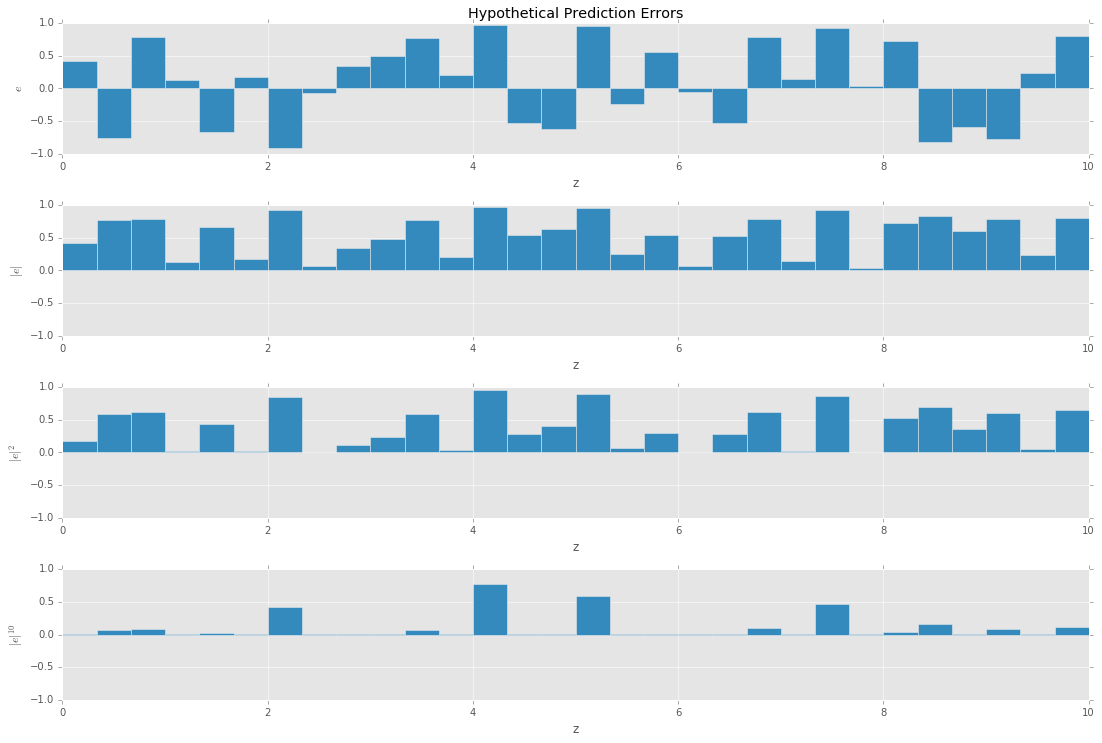

In [2]:
# HYPOTHETICAL PREDICTION ERROR

# x-axis data
z = np.arange(31) / 3

# randomly sampled "errors" from uniform distribution
e = np.random.uniform(-1, 1, 31)

# calculate different norms
e1 = abs(e)
E1 = sum(e1)
e2 = np.power(abs(e), 2)
E2 = sum(e2)**0.5
e10 = np.power(abs(e), 10)
E10 = sum(e10)**0.1

# output error summary
print("Norms\n", "E1:", E1, "E2:", E2, "E10:", E10)

# build figure
plt.subplots(4, 1, figsize=(15, 10))
plt.tight_layout(h_pad=3)

# plot errors
plt.subplot(411)
plt.bar(z-(z[1]-z[0]), e, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$e$')
plt.title('Hypothetical Prediction Errors')

# plot absolute errors
plt.subplot(412)
plt.bar(z-(z[1]-z[0]), e1, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$|e|$')

# plot squared errors
plt.subplot(413)
plt.bar(z-(z[1]-z[0]), e2, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$|e|^2$')

# plot errors to the tenth order
plt.subplot(414)
plt.bar(z-(z[1]-z[0]), e10, width=z[1]-z[0])
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('$|e|^{10}$')

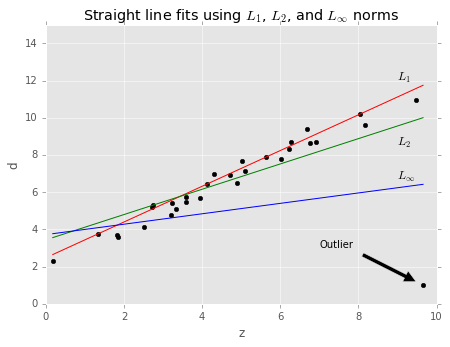

In [3]:
# STRAIGHT LINE FITS UNDER DIFFERENT NORMS

# simulated x-axis data
z = np.sort(np.random.uniform(0, 10, 30))

# simulated observed data
dobs = 2.0 + 1.0 * z + np.random.normal(0, 0.5, 30)

# one terrible outlier
dobs[dobs.shape[0]-1] = 1

# populate a grid with errors
E1 = np.zeros((101, 101))
E2 = np.zeros((101, 101))
Einf = np.zeros((101, 101))
for i in range(0, 101):
    for j in range(0, 101):
        # predicted data
        a0 = 0.04 * (i-1)
        b0 = 0.04 * (j-1)
        dpre = a0 + b0 * z
        
        # calculate errors
        e = dobs - dpre
        
        # calculate norm matrix elements
        abse = abs(e)
        E1[i, j] = np.sum(abse)
        E2[i, j] = np.sum(np.power(abse, 2))
        Einf[i, j] = np.sum(np.power(abse, 20))   # cheating; using large but finite power

# define predicted data for L1 norm
i1 = np.unravel_index(E1.argmin(), E1.shape)
dpre1 = 0.04*(i1[0]) + 0.04*(i1[1]) * z

# define predicted data for L2 norm
i2 = np.unravel_index(E2.argmin(), E2.shape)
dpre2 = 0.04*(i2[0]) + 0.04*(i2[1]) * z

# define predicted data for Linf norm
iinf = np.unravel_index(Einf.argmin(), Einf.shape)
dpreinf = 0.04*(iinf[0]) + 0.04*(iinf[1]) * z

# build figure
plt.subplots(1, 1, figsize=(7, 5))
ax = plt.subplot(111)

# plot observed data
plt.scatter(z, dobs, color='black')

# plot L1, L2, and Linf norm's
plt.plot(z, dpre1, color='red')
plt.plot(z, dpre2, color='green')
plt.plot(z, dpreinf, color='blue')

# annotations
ax.text(9, dpre1[29]+0.25, '$L_1$', fontsize=12)
ax.text(9, dpre2[29]-1.5, '$L_2$', fontsize=12)
ax.text(9, dpreinf[29]+0.25, '$L_\infty$', fontsize=12)
ax.annotate('Outlier', xy=(z[29], dobs[29]), xytext=(7, 3), arrowprops=dict(facecolor='black', shrink=0.1),)

# plot params
plt.xlim(0,10)
plt.ylim(0,15)
plt.xlabel('z')
plt.ylabel('d')
plt.title('Straight line fits using $L_1$, $L_2$, and $L_\infty$ norms')

The $L_2$ norm implies that hte data obey Gaussian statistics.  Gaussians are rather short-tailed functions, so it is appropriate to place considerable weight on any data that have a large prediction error.  

The likelihood of an observed datum falling far from the trend depends on the shape of the distribution for that datum.  Long-tailed distributions imply many scattered (improbable) points.  Short-tailed distributions imply very few scattered points.  The choice of a norm, therefore, implies an assertion that the data obey a particular type of statistics.  

Check on areas
 True: 1 Estimate 1: 0.999999563025 Estimate 2: 0.875550505095


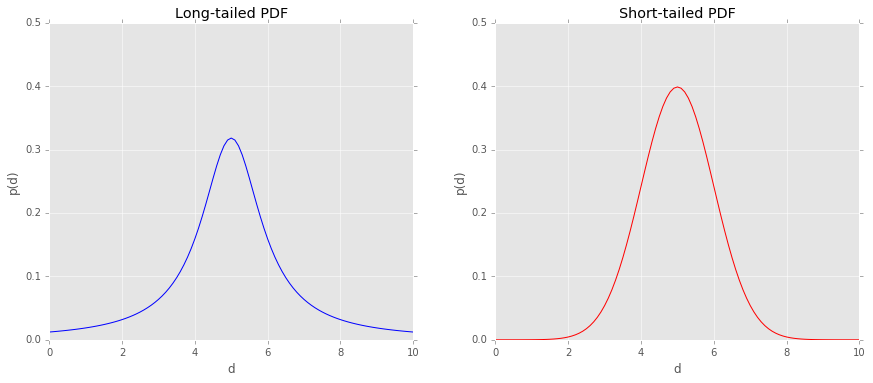

In [4]:
# LONG VS SHORT-TAILED PROBABILITY DENSITY FUNCTIONS

import math

# x-axis data
d = np.arange(101) / 10

# short-tailed probability density function (Normal PDF)
dbar = 5
sd = 1.0
d2 = np.power(d-dbar, 2)
p1 = np.exp(-0.5 * d2 / sd**2) / (math.sqrt(2*math.pi)*sd)
A1 = 0.1 * sum(p1)

# long-tailed distribution (Cauchy-Lorentz distribution)
g = 1
p2 = 1 / (math.pi * g * (1 + d2 / (g**2)))
A2 = 0.1 * sum(p2)

# check on areas
print('Check on areas\n', 'True:', 1, 'Estimate 1:', A1, 'Estimate 2:', A2)

# build figure
plt.subplots(1, 2, figsize=(12, 5))
plt.tight_layout(w_pad=5)
ax = plt.subplot(121)

plt.plot(d, p2, color='blue')
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('d')
plt.ylabel('p(d)')
plt.title('Long-tailed PDF')

ax = plt.subplot(122)

plt.plot(d, p1, color='red')
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('d')
plt.ylabel('p(d)')
plt.title('Short-tailed PDF')

Even though many measurements have approximately Gaussian statistics, most data sets generally have a few outliers that are wildly improbable.  The occurrence of these points demonstrates that the assumption of Gaussian statistics is in error, especially in the tails of the distribution.  If one applies least squares to this kind of problem, the estimates of the model parameters can be completely erroneous.  Least squares weights large errors so heavily that even one "bad" data point can completely throw off the result.  In these situations, methods based on the $L_1$ norm give more reliable estimates.  (Methods that can tolerate a few bad data are said to be *robust*.)  

Matrix norms can be defined in a manner similar to vector norms.  Vector and matrix norms obey the following relationships.  

*Vector norms:*
\begin{equation*}
\| \mathbf{x} \| > 0 \: \text{as long as} \: \mathbf{x} \neq 0 \\
\| a \mathbf{x} \| = |a| \| \mathbf{x} \| \\
\| \mathbf{x} + \mathbf{y} \| \leq \| \mathbf{x} \| + \| \mathbf{y} \|
\end{equation*}  

*Matrix norms:*  
\begin{equation*}
\| \mathbf{A} \|_2 = \left( \sum_{i=1}^N \sum_{j=1}^N A_{ij}^2 \right)^{1/2} \\
\| c \mathbf{A} \| = |c| \| \mathbf{A} \| \\
\| \mathbf{Ax} \| \leq \| \mathbf{A} \| \| \mathbf{x} \| \\
\| \mathbf{AB} \| \leq \| \mathbf{A} \| \| \mathbf{B} \| \\
\| \mathbf{A} + \mathbf{B} \| \leq \| \mathbf{A} \| + \| \mathbf{B} \|
\end{equation*}  

The final *vector* and *matrix* norms equations shown are called *triangle inequalities* because of their similarity to Pythagoras's law for right triangles.  

### 3.3 Least squares for a straight line  

The elementary problem of fitting a straight line to data illustrates the basic procedures applied in this technique.  The model is the assertion that the data can be described by the linear equation $d_i=m_1+m_2 z_i$.  Note that there are two model parameters, *M*=2, and that typically there are many more than two data, *N>M*.  Since a line is defined by precisely two points, it is clearly impossible to choose a straight line that passes through every one of the data, except in the instance that they all lie precisely on the same straight line.  Collinearity rarely occurs when measurements are influenced by noise.  

The fact that the equation $d_i=m_1+m_2z_i$ canot be satisfied for every *i* means that the inverse problem is *overdetermined*; that is, it has no solution for which **e**=0.  One therefore seeks values of the model parameters that solve $d_i=m_1+m_2z_i$ approximately, where the goodness of the approximation is defined by the error.  

\begin{equation*}
E = \mathbf{e}^{\text{T}} \mathbf{e} = \sum_{i=1}^N (d_i - m_1 - m_2 z_i)^2
\end{equation*}  

This problem is then the elementary calculus problem of locating the minimum of the function $E(m_1, m_2)$ and is solved by setting the derivatives of $E$ to zero and solving the resulting equations.  

\begin{equation*}
\frac{\partial E}{\partial m_1} = \frac{\partial}{\partial m_1} \sum_{i=1}^N [d_i - m_1 - m_2 z_i]^2 = 2Nm_1 + 2M_2 \sum_{i=1}^N z_i - 2 \sum_{i=1}^N d_i = 0 \\
\frac{\partial E}{\partial m_2} = \frac{\partial}{\partial m_2} \sum_{i=1}^N [d_i - m_1 - m_2 z_i]^2 = 2m_1 \sum_{i=1}^N z_i + 2m_2 \sum_{i=1}^N z_i^2 - 2 \sum_{i=1}^N z_id_i=0
\end{equation*}  

This is because the definition for the derivative generalized for finite sums is.  

\begin{equation*}
\frac{d}{dx} \left( \sum_{i=1}^N f_i(x) \right) = 
\frac{d}{dx} \left( f_1(x) + f_2(x) + \cdots + f_n(x) \right) = 
\frac{d}{dx} f_1(x) + \frac{d}{dx} f_2(x) + \cdots + \frac{d}{dx} f_n(x)
\qquad \text{so} \qquad
\frac{d}{dx} \left( \sum_{i=1}^N f_i(x) \right) = \sum_{i=1}^N \left( \frac{d}{dx} f_i(x) \right)
\end{equation*}

These two equations are then solved simultaneously for $m_1$ and $m_2$, yielding the classic formulas for the least squares fitting of a line.  

### 3.4 The least squares solution of the linear inverse problem  

Least squares can be extended to the general linear inverse problem in a very straightforward manner.  Again, one computes the derivative of the error *E* with respect to one of the model parameters, say, $m_q$, and sets the result to zero.  The error *E* is.  

\begin{equation*}
E = \mathbf{e}^T \mathbf{e} = (\mathbf{d} - \mathbf{Gm})^T(\mathbf{d}-\mathbf{Gm}) = \sum_{i=1}^N \left[ d_i - \sum_{j=1}^M G_{ij}m_j \right] \left[ d_i - \sum_{k=1}^M G_{ik}m_k \right]
\end{equation*}  

Note that the indices on the sums within the parentheses are different dummy variables, to prevent confusion.  Multiplying out the terms and reversing the order of the summations lead to.  

\begin{equation*}
E = \sum_{j=1}^M \sum_{k=1}^M m_j m_k \sum_{i=1}^N G_{ij} G_{ik} - 2 \sum_{j=1}^M m_j \sum_{i=1}^N G_{ij}d_i + \sum_{i=1}^N d_i d_i
\end{equation*}  

The derivatives $\partial E / \partial m_q$ are now computed.  Performing this differentiation term by term gives  

\begin{equation*}
\frac{\partial}{\partial m_q} \left[ \sum_{j=1}^M \sum_{k=1}^M m_j m_k \sum_{i=1}^N G_{ij} G_{ik} \right] = 
\sum_{j=1}^M \sum_{k=1}^M [\delta_{jq} m_k + m_j \delta_{kq}] \sum_{i=1}^N G_{ij} G_{ik} = 2 \sum_{k=1}^M m_k \sum_{i=1}^N G_{iq} G_{ik}
\end{equation*}  

for the first term.  Since the model parameters are independent variables, derivatives of the form $\partial m_i / \partial m_j$ are either unity, when $i=j$, or zero, when $i \neq j$.  Thus, $\partial m_i / \partial m_j$ is just the Kronecker delta $\delta_{ij}$ and the formula containing it can be simplified trivially.  The second term gives  

\begin{equation*}
-2 \frac{\partial}{\partial m_q} \left[ \sum_{j=1}^M m_j \sum_{i=1}^N G_{ij} d_i \right] = -2 \sum_{j=1}^M \delta_{jq} \sum_{i=1}^N G_{ij} d_i = -2 \sum_{i=1}^N G_{iq} d_i
\end{equation*}  

Since the third term does not contain any $m$'s, it is zero as  

\begin{equation*}
\frac{\partial}{\partial m_q} \left[ \sum_{i=1}^N d_i d_i \right] = 0
\end{equation*}  

Combining these three terms gives  

\begin{equation*}
\frac{\partial E}{\partial m_q} = 0 = 2 \sum_{k=1}^M m_k \sum_{i=1}^N G_{iq} G_{ik} - 2 \sum_{i=1}^N G_{iq} d_i
\end{equation*}  

Writing this equation in matrix notation yields  

\begin{equation*}
\mathbf{G}^T \mathbf{Gm} - \mathbf{G}^T \mathbf{d} = 0
\end{equation*}  

Note that the quantity $\mathbf{G}^T \mathbf{G}$ is a square *MxM* matrix and that it multiplies a vector **m** of length *M*.  The quantity $\mathbf{G}^T\mathbf{d}$ is also a vector of length *M*.  This equation is therefore a square matrix equation for the unknown model parameters.  Presuming that $[\mathbf{G}^T \mathbf{G}]^{-1}$ exists (an important question), we have the following estimate for the model parameters:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^T \mathbf{G}]^{-1} \mathbf{G}^T \mathbf{d}
\end{equation*}  

which is the least squares solution to the inverse problem **Gm=d**.  

When the dimensions of **G** are small (say, *N* and *M* less than a few hundred), the least squares solution can be computed as:

In [5]:
# STRAIGHT LINE PROBLEM: Least squares fit to synthetic data

# x-axis synthetic data
z = np.sort(np.random.uniform(0, 10, 30))

# observed synthetic data (d = a + bz + noise)
dobs = 2.0 + 1.0 * z + np.random.normal(0, 1.0, 30)

# data kernel
M = 2
G = np.array([np.ones(30), z])

# standard matrix solution
mest1 = inv(G.dot(np.transpose(G))).dot(G.dot(dobs)).reshape(2,1)
dpre1 = np.transpose(G).dot(mest1)

However, for larger problems, the computational cost of computing $\mathbf{G}^T \mathbf{G}$ can be prohibitive.  Furthermore, $\mathbf{G}^T \mathbf{G}$ is rarely as sparse as **G** itself.  In this case, an iterative matrix solve, such as the *biconjugate gradient algorithm*, is preferred.  This algorithm only requires products of the form $\mathbf{G}^T \mathbf{Gv}$, where **v** is a vector constructed by the algorithm, and this product can be performed as $\mathbf{G}^T(\mathbf{Gv})$ so that $\mathbf{G}^T \mathbf{G}$ is never explicitly calculated.  SciPy provides the *bicg* function for this!

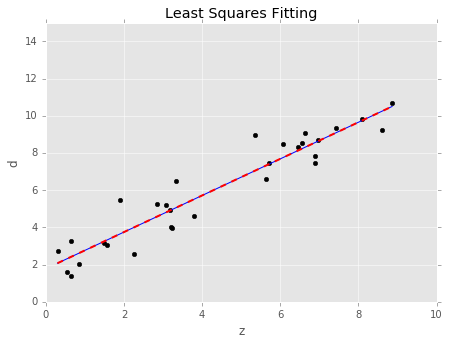

In [6]:
# LARGER PROBLEMS - Use biconjugate gradient algorithm

from scipy.sparse.linalg import bicg

# biconjugate gradient solution (THIS PROBABLY ISN'T RIGHT ...)
mest2 = bicg(G.dot(np.transpose(G)), G.dot(dobs), tol=1e-06, maxiter=90)[0]
dpre2 = np.transpose(G).dot(mest2)

# build figure
plt.subplots(1,1, figsize=(7,5))

# PLOT 1: Simulated data and least squares solution
plt.subplot(111)

# simulated data
plt.scatter(z, dobs, color="black")

# least squares solution and biconjugate gradient solution
plt.plot(z, dpre1, color="blue")
plt.plot(z, dpre2, color='red', ls='dashed', lw=2)

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.title('Least Squares Fitting')
plt.xlabel('z')
plt.ylabel('d')

### 3.5 Some examples  

#### 3.5.1 The straight line problem  

In the straight line problem, the model is $d_i = m_1 + m_2 z_i$, so the equation **Gm=d** has the form:  

\begin{equation*}
\begin{bmatrix}
1 & z_1 \\
1 & z_2 \\
\vdots & \vdots \\
1 & z_N
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2
\end{bmatrix} = 
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} \\
\end{equation*}  

In Python, the matrix **G** can be created with the command *G = np.array([np.ones(30), z])*.  

The matrix products required by the least squares solution are:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{G} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N
\end{bmatrix}
\begin{bmatrix}
1 & z_1 \\ 1 & z_2 \\ \vdots & \vdots \\ 1 & z_N
\end{bmatrix} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2
\end{bmatrix} \\ \\
\text{and} \\ \\
\mathbf{G}^{\text{T}} \mathbf{d} =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N
\end{bmatrix}
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} = 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N d_i z_i
\end{bmatrix} \\
\end{equation*}  

This gives the least squares solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2
\end{bmatrix}^{-1} 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N d_i z_i
\end{bmatrix} \\
\end{equation*}  

#### 3.5.2 Fitting a parabola  

The problem of fitting a parabola is a trivial generalization of fitting a straight line.  Now the model is $d_1 = m_1 + m_2 z_i + m_3 z_i^2$, so the equation **Gm=d** has the form:  

\begin{equation*}
\begin{bmatrix}
1 & z_1 & z_1^2 \\ 1 & z_2 & z_2^2 \\ \vdots & \vdots & \vdots \\ 1 & z_N & z_N^2
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2 \\ m_3
\end{bmatrix} = 
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} \\
\end{equation*}  

In Python, the matrix **G** can be created with the command *G = np.array([np.ones(30), z, np.power(z,2)])*.  The matrix products required by the least squares solution are as follows:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{G} =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N \\
z_1^2 & z_2^2 & \cdots & z_N^2
\end{bmatrix}
\begin{bmatrix}
1 & z_1 & z_1^2 \\
1 & z_2 & z_2^2 \\
\vdots & \vdots & \vdots \\
1 & z_N & z_N^2
\end{bmatrix} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 \\
\sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 & \sum_{i=1}^N z_i^4
\end{bmatrix} \\
\text{and} \\
\mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
z_1 & z_2 & \cdots & z_N \\
z_1^2 & z_2^2 & \cdots & z_N^2
\end{bmatrix}
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} = 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N d_i z_i \\ \sum_{i=1}^N z_i^2 d_i
\end{bmatrix}
\end{equation*}  

Giving the least squares solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 \\
\sum_{i=1}^N z_i^2 & \sum_{i=1}^N z_i^3 & \sum_{i=1}^N z_i^4
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N z_i d_i \\ \sum_{i=1}^N z_i^2 d_i
\end{bmatrix} \\
\end{equation*}  

The following shows an example of using a quadratic fit to examine Kepler's third law which states that the cube of the orbital radius of a planet equals the square of its orbital period.

      Radius      Period
0   57909100    87.96900
1  108208930   224.70000
2  149598261   365.25636
3  227939100   686.97100
4  413832587  1680.50000
mest=
 [-0.02533066  0.00998026  0.02499574]


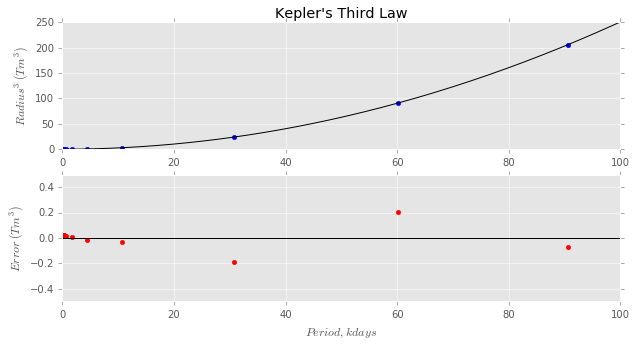

In [7]:
import pandas as pd

# read in data and print first few rows
df = pd.read_csv("../data/planetary.txt", delim_whitespace=True, header=None, names=["Radius", "Period"])
print(df.head())

# load radius and period into numpy arrays
#    divide by 10**9 and 10**3 respectively - computers don't like really big numbers (especially when applying powers)
radius = df.Radius.values / 10**9
period = df.Period.values / 10**3

# take radius**3 to be the observation, period to be auxiliary variable
dobs = np.power(radius, 3)
z = period

# build system matrix G
G = np.array([np.ones(z.shape[0]), z, np.power(z, 2)])
mest = inv(G.dot(np.transpose(G))).dot(G.dot(dobs))
print('mest=\n', mest)

# calculate predicted data and error
dpre = np.transpose(G).dot(mest)
e = dobs - dpre

# build smooth parabola for display, lot's of z's!
zeval = np.arange(0, 251) / 2.5
deval = mest[0] + mest[1] * zeval + mest[2] * np.power(zeval, 2)

plt.subplots(2, 1, figsize=(10, 5))

plt.subplot(211)
plt.scatter(z, dobs, color='blue')
plt.plot(zeval, deval, color='black')
plt.xlim(0,100)
plt.ylim(0,250)
plt.xlabel(r'$Period, kdays$')
plt.ylabel(r'$Radius^3 \: (Tm^3)$')
plt.title('Kepler\'s Third Law')

plt.subplot(212)
plt.scatter(z, e, color='red')
plt.plot(zeval, np.zeros(zeval.shape[0]), color='black')
plt.xlim(0,100)
plt.ylim(-0.5, 0.5)
plt.xlabel(r'$Period, kdays$')
plt.ylabel(r'$Error \: (Tm^3)$')

#### 3.5.3 Fitting a plane surface  

To fit a plane surface, two auxiliary variables, say, *x* and *y*, are needed.  The model is:  

\begin{equation*}
d_i = m_1 + m_2 x_i + m_3 y_i
\end{equation*}  

so the equation **Gm=d** has the form:  

\begin{equation*}
\begin{bmatrix}
1 & x_1 & y_1 \\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots \\
1 & x_N & y_N
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2 \\ m_3
\end{bmatrix} =
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} \\
\end{equation*}  

Now let's try this in *Python* to make a planar fit to depths of earthquakes in the Kurile subduction zone.  

     lat     lon  depth
0  48.16  146.82    430
1  43.92  147.47     53
2  45.21  148.57    113
3  50.44  156.28     59
4  50.83  157.10     54


(-700, 0)

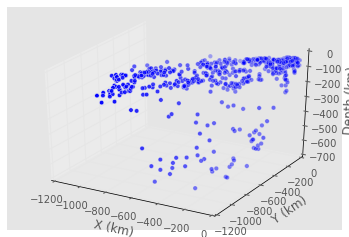

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# read Kurile subduction zone data
df = pd.read_csv("../data/kurile_eqs.txt", delim_whitespace=True, header=None, names=["lat", "lon", "depth"])
print(df.head())

# convert to array and fix units to kilometers
x = 111.12 * np.cos((math.pi/180) * np.mean(df.lat.values)) * (df.lon.values - np.min(df.lon.values))
y = 111.12 * (df.lat.values - np.min(df.lat.values))
z = -1 * df.depth.values

# build figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot data
ax.scatter(-x, -y, z)

# graph params
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Depth (km)')
ax.set_xlim3d(-1200, 0)
ax.set_ylim3d(-1200, 0)
ax.set_zlim3d(-700, 0)

In *Python*, the matrix **G** can be created with the command *G = np.array([np.ones(z.shape[0]), x, y])* forming the matrix products $\mathbf{G}^{\text{T}} \mathbf{G}$:  

\begin{equation*}
\mathbf{G}^{\text{T}} \mathbf{G} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_N \\
y_1 & y_2 & \cdots & y_N 
\end{bmatrix}
\begin{bmatrix}
1 & x_1 & y_1 \\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots \\
1 & x_N & y_N
\end{bmatrix} = 
\begin{bmatrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N y_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i y_i \\
\sum_{i=1}^N y_i & \sum_{i=1}^N x_i y_i & \sum_{i=1}^N y_i^2
\end{bmatrix} \\
\text{and} \\
\mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_N \\
y_1 & y_2 & \cdots & y_N
\end{bmatrix}
\begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix} = 
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N x_i d_i \\ \sum_{i=1}^N y_i d_i
\end{bmatrix} \\
\text{giving the least squares solution} \\
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d} = 
\begin{bmatrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N y_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i y_i \\
\sum_{i=1}^N y_i & \sum_{i=1}^N x_i y_i & \sum_{i=1}^N x_i y_i^2
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum_{i=1}^N d_i \\ \sum_{i=1}^N x_i d_i \\ \sum_{i=1}^N y_i d_i
\end{bmatrix} \\
\end{equation*}  

Applying this to determine a planar fit of a geologic fault using earthquake data along the Kurile subduction zone is shown below!  Neat!

(-700, 0)

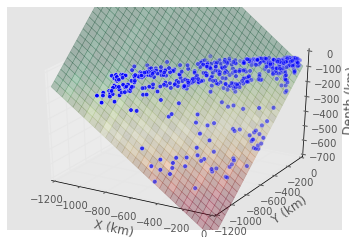

In [9]:
from matplotlib.colors import Normalize
from matplotlib import cm

# setup and solve the inverse problem
G = np.array([np.ones(z.shape[0]), x, y])
mest = inv(G.dot(np.transpose(G))).dot(G.dot(z))
dpre = np.transpose(G).dot(mest)

# setup and calculate values for mesh surface
xx = 1200 * np.arange(0, 31) / 30
yy = 1200 * np.arange(0, 31) / 30
X, Y = np.meshgrid(xx, yy)
Z = mest[0] + mest[1] * X + mest[2] * Y

# build figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# choose any colormap e.g. cm.jet, cm.coolwarm, etc.
color_map = cm.RdYlGn # reverse the colormap: cm.RdYlGn_r
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=-700, vmax=0), cmap=color_map)
C = scalarMap.to_rgba(Z)

# plot data and model
ax.scatter(-x, -y, z)
ax.plot_surface(-X, -Y, Z, rstride=1, cstride=1, facecolors=C, antialiased=True, alpha=0.3)

# graph params
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Depth (km)')
ax.set_xlim3d(-1200, 0)
ax.set_ylim3d(-1200, 0)
ax.set_zlim3d(-700, 0)

### 3.6 The existence of the least squares solution  

The least squares solution arose from consideration of an inverse problem that had no exact solution.  Since there was no exact solution, we chose to do the next best thing: to estimate the solution by those values of the model parameters that gave the best approximate solution (where "best" meant minimizing the $L_2$ prediction error).  By writing a single formula $\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d}$, we implicitly assume that there was only one such "best" solution.  As we shall prove later, least squares fails if the number of solutions that give the same minimum prediction error is greater than one.  

To see that least squares fails for problems with nonunique solutions, consider the straight line problem with only one data point.  It is clear that this problem is nonunique; many possible lines can pass through the point, and each has zero prediction error.  The solution then contains the following expression:  

\begin{equation*}
[\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} = 
\begin{bmatrix}
N & \sum_{i=1}^N z_i \\
\sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2
\end{bmatrix}^{-1}
\rightarrow 
\begin{bmatrix}
1 & z_i \\ z_i & z_1^2
\end{bmatrix}^{-1}\\
\end{equation*}

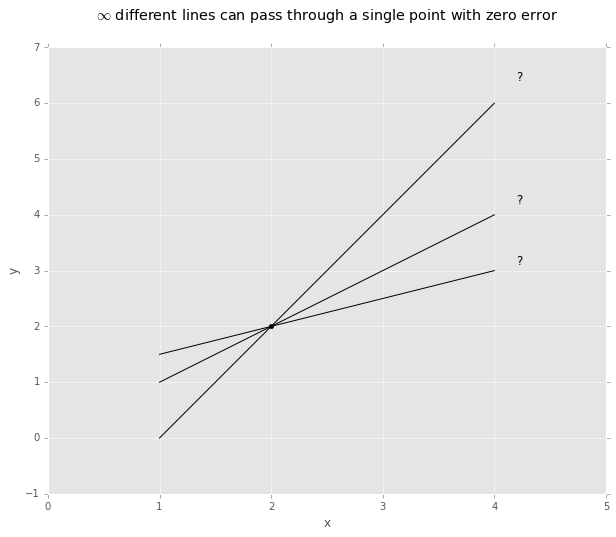

In [10]:
# single data point
xd = np.array([2])
yd = np.array([2])

# x-axis
x = np.arange(1,4+0.1,0.1)

# first solution: y=x
y1 = x

# second solution: y=2x-2
y2 = 2 * x - 2

# third solution: y=0.5x+1
y3 = 0.5 * x + 1

# build figure
plt.subplots(1,1, figsize=(10,8))
ax = plt.subplot(111)

# single data point
plt.scatter(xd, yd, color="black")

# least squares solution and biconjugate gradient solution
plt.plot(x, y1, color="black")
plt.plot(x, y2, color='black')
plt.plot(x, y3, color="black")

ax.text(4.2, 4.2, '?', fontsize=12)
ax.text(4.2, 6.4, '?', fontsize=12)
ax.text(4.2, 3.1, '?', fontsize=12)

# graphing params
plt.xlim(0,5)
plt.ylim(-1,7)
plt.title('$\infty$ different lines can pass through a single point with zero error')
plt.xlabel('x')
plt.ylabel('y')
ttl = ax.title
ttl.set_position([.5, 1.05])

The inverse of a matrix is proportional to the reciprocal of the determinant of the matrix so that:  

\begin{equation*}
[\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \varpropto \left( \det
\begin{bmatrix}
1 & z_1 \\ z_1 & z_1^2
\end{bmatrix}
\right)^{-1} = \frac{1}{z_1^2-z_1^2}\\
\end{equation*}  

This expression is clearly singular.  The formula for the least squares solution fails.  

The question of whether the equation **Gm=d** provides enough information to specify uniquely the model parameters serves as a basis for classifying inverse problems.  A classification system based on this criterion is now discussed!  

#### 3.6.1 Underdetermined problems  

When the equation **Gm=d** does not provide enough information to determine uniquely all the model parameters, the problem is said to be *underdetermined*.  As we saw in the example above, this can happen if there are several solutions that have zero prediction error.  From elementary linear algebra, we know that underdetermined problems occur when there are more unknowns than data, that is, when *M>N*.  We must note, however, that there is no special reason why the prediction error must be zero for an underdetermined problem.  Frequently, the data uniquely determine some of the model parameters but not others.  For example, consider the acoustic experiment of two adjacent bricks and both the source and receiver are attached to the first brick.  Since no measurements are made of the acoustic slowness in the second of two bricks, it is clear that this model parameter is completely unconstrained by the data.  In contrast, the acoustic slowness of the first brick is *overdetermined*, since in the presence of measurement noise, no choice of $s_1$ can satisfy the data exactly.  The equation describing this experiment is:  

\begin{equation*}
h \begin{bmatrix}
1 & 0 \\ 1 & 0 \\ \vdots & \vdots \\ & 1 & 0
\end{bmatrix} \begin{bmatrix}
s_1 \\ s_2
\end{bmatrix} = \begin{bmatrix}
d_1 \\ d_2 \\ \vdots \\ d_N
\end{bmatrix}\\
\end{equation*}

where $s_i$ is the slowness in the *i*th brick, *h* the brick width, and the $d_i$ the measurements of travel time.  If one were to attempt to solve this problem with least squares, one would find that the term $[\mathbf{G}^{\text{T}} \mathbf{G}]^{-1}$ is singular.  Even though *M<N*, the problem is still underdetermined since the data kernel has a very poor structure.  Although this is a rather trivial case in which only some of the model parameters are underdetermined, in realistic experiments, the problem arises in more subtle forms.  

We shall refer to underdetermined problems that have nonzero prediction error as *mixed-determined problems*, to distinguish them from *purely underdetermined problems* that have zero prediction error.  

#### 3.6.2 Even-determined problems  

In even-determined problems, there is exactly enough information to determine the model parameters.  There is only one solution, and it has zero prediction error.  

#### 3.6.3 Overdetermined problems  

When there is too much information contained in the equation **Gm=d** for it to possess an exact solution, we speak of it as being *overdetermined*.  This is the case in which we can employ least squares to select a "best" approximate solution.  Overdetermined problems typically have more data than unknowns, that is, *N>M*, although for the reasons discussed above it is possible to have problems that are to some degree overdetermined even when *N<M* and to have problems that are to some degree underdetermined even when *N>M*.  

To deal successfully with the full range of inverse problems, we shall need to be able to characterize whether an inverse problem is under- or overdetermined (or some combination of the two).  We shall develop quantitative methods for making this characterization later.  For the moment, we assume that it is possible to characterize the problem intuitively on the basis of the kind of experiment the problem represents.  

### 3.7 The purely underdetermined problem  

Suppose that an inverse problem **Gm=d** has been identified as one that is purely underdetermined.  For simplicity, assume that there are fewer equations than unknown model parameters, that is, *N<M*, and that there are no inconsistencies in these equations.  It is therefore possible to find more than one solution for which the prediction error *E* is zero.  (In fact, we shall show that underdetermined linear inverse problems have an infinite number of such solutions.)  Although the data provide information about the model parameters, they do not provide enough to determine them uniquely.  

We must have some means of singling out precisely one of the infinite number of solutions with zero prediction error *E* to obtain a unique solution $\mathbf{m}^{\text{est}}$ to the inverse problem.  To do this, we must add to the problem some information not contained in the equation **Gm=d**.  This extra information is called *a priori* information.  *A priori* information can take many forms, but in each case, it quantifies expectations about the character of the solution that are not based on the actual data.  

For instance, in the case of fitting a straight line through a single data point, one might have the expectation that the line also passes through the origin.  This *a priori* information now provides enough information to solve the inverse problem uniquely, since two points (one datum, one *a priori*) determine a line.  

Another example of *a priori* information concerns expectations that the model parameters possess a given sign or lie in a given range.  For instance, suppose the model parameters represent density at different points in the earth.  Even without making any measurements, one can state with certainty that the density is everywhere positive, since density is an inherently positive quantity.  Furthermore, since the interior of the earth can reasonably be assumed to be rock, its density must have values in some range known to characterize rock, say between 1000 and 10,000 $kg/m^3$.  If one can use *a priori* information when solving the inverse problem, it may greatly reduce the range of possible solutions - or even cause the solution to be unique.  

There is something unsatisfying about having to add *a priori* information to an inverse problem to single out a solution.  Where does this information come from, and how certain is it?  There are no firm answers to these questions.  In certain instances, one might be able to identify reasonable *a priori* assumptions; in other instances, one might not.  Clearly, the importance of the *a priori* information depends greatly on the *use* one plans for the estimated model parameters.  If one simply wants one example of a solution to the problem, the choice of *a priori* information is unimportant.  However, if one wants to develop arguments that depend on the uniqueness of the estimates, the validity of the *a priori* assumptions is of paramount importance.  These problems are the price one must pay for estimating the model parameters of a nonunique inverse problem.  As will be shown later, there are other kinds of "answers" to inverse problems that do not depend on *a priori* information (localized averages, for example).  However, these answers invariably are not as easily interpretable as estimates of model parameters.  

The first kind of *a priori* assumption we shall consider is the expectation that the solution to the inverse problem is *simple*, where the notion of simplicity is quantified by some measure of length of the solution.  One such measure is simply the Euclidean length of the solution, $L=\mathbf{m}^{\text{T}} \mathbf{m}=\sum m_i^2$.  A solution is therefore defined to be simple if it is small when measured under the $L_2$ norm.  Admittedly, this measure is perhaps not a particularly realistic measure of simplicity.  It can be useful occasionally, and we shall describe shotly how it can be generalized to more realistic measures.  One instance in which solution legnth may be realistic is when the model parameters describe the velocity of various points in a moving fluid.  The length *L* is then a measure of the kinetic energy of the fluid.  In certain instances, it may be appropriate to find that velocity field in the fluid that has the smallest possible kinetic energy of those solutions satisfying the data.  

We pose the following problem: Find the $\mathbf{m}^{\text{est}}$ that minimizes $L = \mathbf{m}^{\text{T}} \mathbf{m} = \sum m_i^2$ subject to the constraint that **e=d-Gm=**0.  This problem can easily be solved by the method of Lagrange multipliers.  We minimize the function as:  

\begin{equation*}
\mathbf{\phi} (\mathbf{m}) = L + \sum_{i=1}^N \lambda_i e_i = \sum_{i=1}^M m_i^2 + \sum_{i=1}^N \lambda_i \left[ d_i - \sum_{j=1}^M G_{ij} m_j \right]\\
\end{equation*}

with respect to $m_q$, where $\lambda_i$ are the Lagrange multipliers.  Taking the derivatives yields:  

\begin{equation*}
\frac{\partial \mathbf{\phi}}{\partial m_q} = \sum_{i=1}^M 2 \frac{\partial m_i}{\partial m_q} m_i - \sum_{i=1}^N \lambda_i \sum_{j=1}^M G_{ij} \frac{\partial m_j}{\partial m_q} = 2 m_q - \sum_{i=1}^N \lambda_i G_{iq}\\
\end{equation*}  

Setting this result to zero and rewriting it in matrix notation yield the equation $2\mathbf{m}=\mathbf{G}^{\text{T}} \mathbf{\lambda}$, which must be solved along with the constraint equation **Gm=d**.  Plugging the first equation into the second gives $\mathbf{d} = \mathbf{Gm} = \mathbf{G} [\mathbf{G}^{\text{T}} \mathbf{\lambda}/2]$.  We note that the matrix $\mathbf{GG}^{\text{T}}$ is a square *NxN* matrix.  If its inverse exists, we can then solve this equation for the Lagrange multipliers, $\mathbf{\lambda}=2[\mathbf{GG}^{\text{T}}]^{-1} \mathbf{d}$.  Then inserting this expression into the first equation yields the solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = \mathbf{G}^{\text{T}} [\mathbf{GG}^{\text{T}}]^{-1} \mathbf{d}\\
\end{equation*}

We shall discuss the conditions under which this solution exists later.  As we shall see, one condition is that the equation **Gm=d** be purely underdetermined - that it contain no inconsistencies.  

### 3.8 Mixed-determined problems  

Most inverse problems that arise in practice are neither completely overdetermined nor completely underdetermined.  For instance, in the X-ray tomography problem, there may be one box through which several rays pass.  The X-ray opacity of this box is clearly overdetermined.  On the other hand, there may be boxes that have been missed entirely.  These boxes are completely underdetermined.  There may also be boxes that cannot be individually resolved because every ray that passes through one also passes through an equal distance of the other.  These boxes are also underdetermined, since only their mean opacity is determined.  

Ideally, we would like to sort the unknon model parameters into two groups: those that are overdetermined and those that are underdetermined.  Actually, to do this, we need to form a new set of model parameters that are linear combinations of the old.  For example, in the two box problem above, the average opacity $m`_1 = \frac{1}{2} (m_1 + m_2)$, whereas the difference in opacity $m`_2 = \frac{1}{2} (m_1 - m_2)$ is completely underdetermined.  We want to perform this partitioning from an arbitrary equation $\mathbf{Gm}=\mathbf{d} \rightarrow \mathbf{G`m`} = \mathbf{d`}$, where $\mathbf{m`}$ is partitioned into an upper part $\mathbf{m}`^o$ that is overdetermined and a lower part $\mathbf{m}`^u$ that is underdetermined:  

\begin{equation*}
\begin{bmatrix}
\mathbf{G}`^o & 0 \\ 0 & \mathbf{G}`^u
\end{bmatrix}
\begin{bmatrix}
\mathbf{m}`^o \\ \mathbf{m}`^u
\end{bmatrix} = 
\begin{bmatrix}
\mathbf{d}`^o \\ \mathbf{d}`^u
\end{bmatrix}\\
\end{equation*}

If this can be achieved, we could determine the overdetermined model parameters by solving the upper equations in the least squares sense and determine the underdetermined model parameters by finding those that have minimum $L_2$ solution length.  In addition, we would have found a solution that added as little *a priori* information to the inverse problem as possible.  

This partitioning process can be accomplished through singular-value decomposition of the data kernel, a process that we shall discuss in Chapter 7.  Since it is a relatively time-consuming process, we first examine an approximate process that works if the inverse problem is not too underdetermined.  

Instead of partitioning **m**, suppose that we determine a solution that minimizes some combination $\phi$ of the prediction error and the solution length for hte unpartitioned model parameters:  

\begin{equation*}
\phi(\mathbf{m}) = E + \epsilon^2 L = \mathbf{e}^{\text{T}} \mathbf{e} + \epsilon^2 \mathbf{m}^{\text{T}} \mathbf{m}\\
\end{equation*}

where the weighting factor $\epsilon^2$ determines the relative importance given to the prediction error and solution length.  If $\epsilon$ is made large enough, this procedure will clearly minimize the underdetermined part of the solution.  Unfortunately, it also tends to minimize the overdetermined part of the solution.  As a result, the solution will not minimize the prediction error *E* and will not be a very good estimate of the true model parameters.  If $\epsilon$ is set to zero, the prediction error will be minimized, but no *a priori* information will be provided to single out the underdetermined model parameters.  It may be possible, however, to find some compromise value for $\epsilon$ that will approximately minimize *E* while approximately minimizing the length of the underdetermined part of the solution.  There is no simple method of determining what this compromise $\epsilon$ should be (without solving the partitioned problem); it must be determined by trial and error.  By minimizing $\mathbf{\phi} (\mathbf{m})$ with respect to the model parameters in a manner exactly analogous to the least squares derivation, we obtain:  

\begin{equation*}
[\mathbf{G}^{\text{T}} \mathbf{G} + \epsilon^2 \mathbf{I}] \mathbf{m}^{\text{est}} = \mathbf{G}^{\text{T}} \mathbf{d}
\qquad \text{or} \qquad
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G} + \epsilon^2 \mathbf{I}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d}\\
\end{equation*}

This estimate of the model parameters is called the *damped least squares* solution.  The concept of error has been generalized to include not only prediction error but also error in fitting the *a priori* information (that the solution legnth is zero, in this case).  The underdeterminacy of the inverse problem is said to have been damped.  

### 3.9 Weighted measures of length as a type of *a priori* information  

There are many instances in which $L=\mathbf{m}^{\text{T}} \mathbf{m}$ is not a very good measure of solution simplicity.  For instance, suppose that one were solving an inverse problem for density fluctuations in the ocean.  One may not want to find a solution that is smallest in the sense of closest to zero but one that is smallest in the sense that it is closest to some other value, such as the average density of sea water.  The obvious generalization of *L* is then:  

\begin{equation*}
L = (\mathbf{m} - \langle \mathbf{m} \rangle)^{\text{T}} (\mathbf{m} - \langle \mathbf{m} \rangle)\\
\end{equation*}

where $\langle \mathbf{m} \rangle$ is the *a priori* value of the model parameters (a known typical value of sea water, in this case).  

Sometimes the whole idea of length as a measure of simplicity is inappropriate.  For instance, one may feel that a solution is simple if it is flat or if it is smooth.  These measures may be particularly appropriate when the model parameters represent a discretized continuous function such as density or X-ray opacity.  One may have the expectation that these parameters vary only slowly with position.  Fortunately, properties such as *flatness* can be easily quantified by measures that are generalizations of length.  For example, the flatness of a continuous function of space can be quantified by the norm of its first derivative, which is a measure of *steepness* (the opposite of flatness).  For discrete model parameters, one can use the difference between physically adjacent model parameters as approximations of a derivative.  The steepness **l** of a vector **m** is then:  

\begin{equation*}
\mathbf{l} = \frac{1}{\Delta x}
\begin{bmatrix}
-1 & 1 & & & \\
 & -1 & 1 & & \\
 & & \ddots & \ddots & \\
 & & & -1 & 1
\end{bmatrix}
\begin{bmatrix}
m_1 \\ m_2 \\ \vdots \\ m_M
\end{bmatrix} = \mathbf{Dm}\\
\end{equation*}

where **D** is the *steepness matrix*.  Other methods of simplicity can also be represented by a matrix multiplying the model parameters.  For instance, solution smoothness can be implemented by quantifying *roughness* (the opposite of smoothness) by the second derivative.  The matrix multiplying the model parameters would then have rows containing $(\Delta x)^{-2} [\cdots 1 -2 1 \cdots]$.  The overall steepness or roughness of the solution is then just the length:  

\begin{equation*}
L = \mathbf{l}^{\text{T}} \mathbf{l} = [\mathbf{Dm}]^{\text{T}}[\mathbf{Dm}] = \mathbf{m}^{\text{T}} \mathbf{D}^{\text{T}} \mathbf{Dm} = \mathbf{m}^{\text{T}} \mathbf{W}_m \mathbf{m}\\
\end{equation*}

The matrix $\mathbf{W}_m=\mathbf{D}^{\text{T}} \mathbf{D}$ can be interpreted as a weighting factor that enters into the calculation of the length of the vector **m**.  Note, however, that $\| \mathbf{m} \|^2_{\text{weighted}} = \mathbf{m}^{\text{T}} \mathbf{W}_m \mathbf{m}$ is *not* a proper norm, since it violates the positivity condition given in $\| \mathbf{m} \|^2_{\text{weighted}} = 0$ for some nonzero vectors (such as the constant vector).  This behavior usually poses no insurmountable problems, but it can cause solutions based on minimizing this norm to be nonunique.  

The measure of solution simplicity can therefore be generalized to:  

\begin{equation*}
L = [\mathbf{m} - \langle \mathbf{m} \rangle]^{\text{T}} \mathbf{W}_m [\mathbf{m} - \langle \mathbf{m} \rangle]\\
\end{equation*}

By suitably choosing the *a priori* model vector $\langle \mathbf{m} \rangle$ and the weighting matrix $\mathbf{W}_m$, we can quantify a wide variety of measures of simplicity.  

Weighted measures of the prediction error can also be useful.  Frequently some observations are made with more accuracy than others.  In this case, one would like the prediction error $e_i$ of the more acurate observations to have a greater weight in the quantification of the overall error *E* than the inaccurate observations.  To accomplish this weighting, we define a generalized prediction error:  

\begin{equation*}
E = \mathbf{e}^{\text{T}} \mathbf{W}_e \mathbf{e}\\
\end{equation*}

where the matrix $\mathbf{W}_e$ defines the relative contribution of each individual error to the total prediction error.  Normally we would choose this matrix to be diagonal.  For example, if *N=5* and the third observation is known to be twice as accurately determined as the others, one might use:  

\begin{equation*}
\mathbf{W}_e =
\begin{bmatrix}
1 & & & & \\
 & 1 & & & \\
 & & 2 & & \\
 & & & 1 & \\
 & & & & 1
\end{bmatrix}\\
\end{equation*}

The inverse problem solutions stated above can then be modified to take into account these new measures of prediction error and solution simplicity.  The derivations are substantially the same as for the unweighted cases but the algebra is lengthy.  

#### 3.9.1 Weighted least squares  

If the equation **Gm=d** is completely overdetermined, then one can estimate the model parameters by minimizing the generalized prediction error $E = \mathbf{e}^{\text{T}} \mathbf{W}_e \mathbf{e}$.  This procedure leads to the solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{d}\\
\end{equation*}  

#### 3.9.2 Weighted minimum length  

If the equation **Gm=d** is completely underdetermined, then one can estimate the model parameters by choosing the solution that is simplest, where simplicity is defined by the generalized length $L = [\mathbf{m} - \langle \mathbf{m} \rangle]^{\text{T}} \mathbf{W}_m [\mathbf{m} - \langle \mathbf{m} \rangle]^{\text{T}}$.  This procedure leads to the solution:  

\begin{equation*}
\mathbf{m}^{\text{est}} = \langle \mathbf{m} \rangle + \mathbf{W}^{-1}_m \mathbf{G}^{\text{T}} [\mathbf{GW}^{-1}_m \mathbf{G}^{\text{T}}]^{-1} [\mathbf{d} - \mathbf{G} \langle \mathbf{m} \rangle]\\
\end{equation*}  

#### 3.9.3 Weighted damped least squares  

If the equation **Gm=d** is slightly underdetermined, it can be solved by minimizing a combination of prediction error and solution length, $\phi(\mathbf{m})=E+\epsilon^2 L$.  The parameter $\epsilon$ is chosen by trial and error to yield a solution that has a reasonably small prediction error.  The equation for the solution, obtained by minimizing $\phi$ with respect to **m**, is then:  

\begin{equation*}
[\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G} + \epsilon^2 \mathbf{W}_m] \mathbf{m}^{\text{est}} = \mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{d} + \epsilon^2 \mathbf{W}_m \langle \mathbf{m} \rangle
\\ \text{or} \\
\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G} + \epsilon^2 \mathbf{W}_m]^{-1}[\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{d} + \epsilon^2 \mathbf{W}_m \langle \mathbf{m} \rangle]
\end{equation*}

This equation appears to be rather complicated.  However, it can be vastly simplified by noting that it is equivalent to solving the equation:  

\begin{equation*}
\mathbf{Fm}^{\text{est}} = \mathbf{f} \qquad \text{with} \qquad \mathbf{F}=
\begin{bmatrix}
\mathbf{W}^{1/2}_e \mathbf{G} \\ \epsilon \mathbf{D}
\end{bmatrix}
\qquad \text{and} \qquad
\mathbf{f} =
\begin{bmatrix}
\mathbf{W}^{1/2}_e \mathbf{d} \\ \epsilon \mathbf{D} \langle \mathbf{m} \rangle
\end{bmatrix}
\qquad \text{and} \qquad
\mathbf{W}_m = \mathbf{D}^{\text{T}} \mathbf{D}\\
\end{equation*}

by simple least squares; that is, the equation $\mathbf{F}^{\text{T}} \mathbf{Fm}^{\text{est}} = \mathbf{F}^{\text{T}} \mathbf{f}$, when multiplied out, is identical to the previous equation for $\mathbf{m}^{\text{est}}$.  As explained previously, the weight matrix $\mathbf{W}_e$ is typically diagonal.  In that case, its square root, $\mathbf{W}^{1/2}_e$, is also diagonal with elements that are the square roots of the corresponding elements of $\mathbf{W}_e$.  

The above equation has a very simple interpretation: its top row is the data equation $\mathbf{Gm}^{\text{est}}=\mathbf{d}$, with both sides multiplied by the weight matrix $\mathbf{W}^{1/2}_e$, and its bottom row is the *a priori* equation, $\mathbf{m}^{\text{est}} = \langle \mathbf{m} \rangle$, with both sides multiplied by the *a priori* matrix, $\epsilon \mathbf{D}$.  Note that the data and *a priori* information play copmletely symmetric roles in this equation.  

This simplified equation is extremely well suited to computations, especially if a sparse matrix is used for **F**.  As an example, suppose that **m** represents the values of a function *m(z)* at evenly spaced *z*'s, but that only a few of these *m*'s have been observed.  The data equation is then just $m_i=d_j$, where indices *i* and *j* "match up" the observation with the corresponding model parameter.  The *i*th row of the data kernel matrix **G** is all zero, exept for a single one in the *j*th column.  Since the observations are insufficient to determine all the model parameters, we add *a priori* information of smoothness using a roughness matrix **D**.  Each row of **D** is mostly zeros, except for hte sequence [1 -2 1], with the -2 centered on the model parameter whose second derivative is being computed.  We can only form *M-2* of these rows, since computing the second derivative of $m_1$ or $m_M$ would require model parameters off the ends of **m**.  We choose to add *a priori* information of flatness at these two points, with a steepness matrix **D** with rows containing the sequence [-1 1].  In both the roughness and steepness case, the vector $\mathbf{D} \langle \mathbf{m} \rangle$ is taken to be zero, since the solution is taken to be smooth and flat.  This leads to an equation **Fm=f** of the form:  

\begin{equation*}
\mathbf{F} = 
\begin{bmatrix}
 & 1 & & & & & & & & & \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
 & & & & & & 1 & & & & \\
 - & - & - & - & - & - & - & - & - & - & - \\
 a & -2a & a & & & & & & & & \\
 & & & & & & & & a & -2a & a \\
 - & - & - & - & - & - & - & - & - & - & - \\
-b & b & & & & & & & & & \\
& & & & & & & & & -b & b
\end{bmatrix}
\qquad \text{and} \qquad \mathbf{f} =
\begin{bmatrix}
d_1 \\ \vdots \\ d_N \\ - \\ 0 \\ \vdots \\ 0 \\ - \\ 0 \\ 0
\end{bmatrix}
\end{equation*}  

Here $a=\epsilon(\Delta x)^{-2}$ and $b=\epsilon(\Delta x)^{-1}$.  This equation can be solved using the biconjugate gradient algorithm.

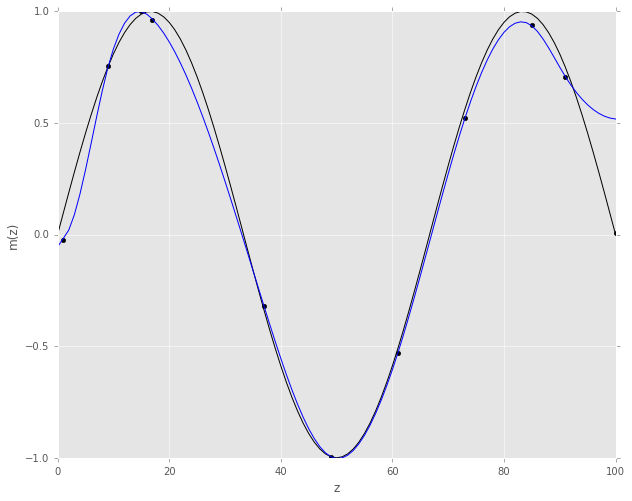

In [11]:
from scipy.sparse import csr_matrix

# sample data from a sinusoid in an auxiliary variable z
M = 101
Dz = 1.0
z = np.arange(0,M)
zmax = np.max(z)
mtrue = np.sin(3 * math.pi * z / zmax)

# let us suppose that we observe the sine wave at the following z indices
index = np.array([(1, 9, 15, 17, 37, 49, 61, 73, 85, 91, M-1)])
N = index.shape[1]
zobs = z[index]
dobs = np.sin(3 * math.pi * zobs/zmax) + np.random.normal(0, 0.05, N)

# the N data equations are just m=dobs.  The only trick is lining up the corresponding elements of m and dobs,
# since they are not the same length
F = np.zeros((N+M, M))
f = np.zeros(N+M)
for i in range(0, N-1):
    F[i, index[0][i]] = 1
    f[i] = dobs[0][i]

# now implement the 2nd derivative smoothness constraints of all interior m's
epsilon = 1.0
rDz = 1/Dz
rDz2 = 1 / Dz**2
for i in range(0, M-2):
    F[i+N, i] = epsilon * rDz2
    F[i+N, i+1] = -2 * epsilon * rDz2
    F[i+N, i+2] = epsilon * rDz2
    f[i+N] = 0

# now implement 1st derivative flatness constraints for m's at edge
F[N+M-2, 1] = -epsilon * rDz
F[N+M-2, 2] = epsilon * rDz
F[N+M-1, M-2] = -epsilon * rDz
F[N+M-1, M-1] = epsilon * rDz
f[N+M-1] = 0
    
# now convert to a sparse matrix data type, and solve using biconjugate gradient
F = csr_matrix(F)
mest = bicg(F.transpose().dot(F), F.transpose().dot(f), tol=1e-06, maxiter=3*M)[0]

# build figure
plt.subplots(1,1, figsize=(10,8))
ax = plt.subplot(111)

# single data point
plt.scatter(zobs, dobs, color="black")

# least squares solution and biconjugate gradient solution
plt.plot(z, mtrue, color="black")
plt.plot(z, mest, color="blue")

# graphing params
plt.xlim(0,100)
plt.ylim(-1,1)
plt.xlabel('z')
plt.ylabel('m(z)')

The equation above (for $\mathbf{m}^{\text{est}}$ can be manipulated into another useful form by subtracting $[\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G} + \epsilon^2 \mathbf{W}_m] \langle \mathbf{m} \rangle$ from both sides of the equation and rearranging to obtain:  

\begin{equation*}
[\mathbf{m}^{\text{est}} - \langle \mathbf{m} \rangle] = [\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G} + \epsilon^2 \mathbf{W}_m]^{-1} \mathbf{G}^{\text{T}} \mathbf{W}_e [\mathbf{d} - \mathbf{G} \langle \mathbf{m} \rangle]\\
\end{equation*}

This eqaution is of the form:  

\begin{equation*}
\Delta \mathbf{m} = \mathbf{M} \Delta \mathbf{d} \\
\text{with} \qquad \Delta \mathbf{d} = \mathbf{d} - \mathbf{G} \langle \mathbf{m} \rangle
\qquad \text{and} \qquad \Delta \mathbf{m} = [\mathbf{m}^{\text{est}} - \langle \mathbf{m} \rangle] \\
\text{and} \qquad \mathbf{M} = [\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G} + \epsilon^2 \mathbf{W}_m]^{-1} \mathbf{G}^{\text{T}} \mathbf{W}_e
\end{equation*}

This form emphasizes that the *deviation* $\Delta \mathbf{m}$ of the estimated solution from the *a priori* value is a linear function of the deviation $\Delta \mathbf{d}$ of the data from the value predicted by the *a priori* model.  

Finally, we note that an alternative form of **M** above, reminiscent of the minimum-length solution, is:  

\begin{equation*}
\mathbf{M} = \mathbf{M}^{-1}_m \mathbf{G}^{\text{T}} [\mathbf{GW}^{-1}_m \mathbf{G}^{\text{T}} + \epsilon^2 \mathbf{W}^{-1}_e]^{-1}\\ 
\end{equation*}

The equivalence can be demonstrated by equating the two forms of **M**, premultiplying by $[\mathbf{G}^{\text{T}} \mathbf{W}_e \mathbf{G} + \epsilon^2 \mathbf{W}_m]$ and postmultiplying by $[\mathbf{GW}^{-1}_m \mathbf{G}^{\text{T}}+\epsilon^2 \mathbf{W}^{-1}_e]$.  In both instances, one must take care to ascertain whether the inverses actually exist.  Depending on the choice of the weighting matrices, sufficient *a priori* information may or may not have been added to the problem to damp the underdeterminacy.  

### 3.10 Other types of *a priori* information  

One commonly encountered type of *a priori* information is the knowledge that some function of the model parameters equals a constant.  Linear equality constraints of the form **Hm=h** are particularly easy to implement.  For example, one such linear constraint requires that the mean of the model parameters must equal some value4 $h_1$:  

\begin{equation*}
\mathbf{Hm} = \frac{1}{M} 
\begin{bmatrix}1 & 1 & \cdots & 1 \end{bmatrix}
\begin{bmatrix}m_1 \\ m_2 \\ \vdots \\ m_M \end{bmatrix}
= [h_1] = \mathbf{h}\\
\end{equation*}

Another such constraint requires that a particular model parameter, $m_k$, equals a given value:  

\begin{equation*}
\mathbf{Hm} = 
\begin{bmatrix}0 & \cdots & 0 & 1 & 0 & \cdots & 0 \end{bmatrix}
\begin{bmatrix}m_1 \\ \vdots \\ m_k \\ \vdots \\ m_M \end{bmatrix}
= [ \langle h_k \rangle ] = \mathbf{h}\\
\end{equation*}  

One problem that frequently arises is to solve an inverse problem **Gm=d** in the least squares sense with the *a priori* constraint that linear relationships between the model parameters of the form **Hm=h** are satisfied exactly.  

One way to implement this constraint is to use weighted damped least squares, with **D=H** and $\mathbf{D} \langle \mathbf{m} \rangle = \mathbf{h}$, and with the weighting factor $\epsilon$ chosen to be very large, so that the *a priori* equations are given much more weight than the data equations.  This method is well suited for computation, but it does require the value of $\epsilon$ to be chosen with some care - too big and the solution will suffer from numerical noise; too small and the constraints will be only very approximately satisfied.  

Another method of implementing the constraints is through the use of Lagrange multipliers.  One minimizes $E = \mathbf{e}^{\text{T}} \mathbf{e}$ with the constraint that **Hm-h**=0 by forming the function:  

\begin{equation*}
\Phi (m) = \sum_{i=1}^N \left[ \sum_{j=1}^M G_{ij} m_j - d_i \right]^2 + 2 \sum_{i=1}^p \lambda_i \left[ \sum_{j=1}^M H_{ij} m_j - h_i \right]\\
\end{equation*}

(where there are *p* constraints and 2$\lambda_i$ are the Lagrange multipliers) and setting its derivatives with respect to the model parameters to zero as:  

\begin{equation*}
\frac{\partial \Phi(m)}{\partial m_q} = 2 \sum_{i=1}^M m_i \sum_{j=1}^N G_{jq} G_{ji} - 2 \sum_{i=1}^N G_{iq} d_i + 2 \sum_{i=1}^p \lambda_i H_{iq}\\
\end{equation*}  

This equation must be solved simultaneously with the constraint equations **Hm=h** to yield the estimated solution.  These equations, in matrix form, are:  

\begin{equation*}
\begin{bmatrix} \mathbf{G}^{\text{T}} \mathbf{G} & \mathbf{H}^{\text{T}} \\ \mathbf{H} & 0 \end{bmatrix}
\begin{bmatrix} \mathbf{m} \\ \mathbf{\lambda} \end{bmatrix} =
\begin{bmatrix} \mathbf{G}^{\text{T}} \mathbf{d} \\ \mathbf{h} \end{bmatrix}\\
\end{equation*}

Although these equations can be manipulated to yield an explicit formula for $\mathbf{m}^{\text{est}}$, it is often more convenient to solve directly this *M+p* system of equations for *M* estimates of model parameters and *p* Lagrange multipliers by premultiplying by the inverse of the square matrix.  

#### 3.10.1 Example: Constrainted fitting of a straight line  

Consider the problem of fitting the straight line $d_i = m_1 + m_2 z_i$ to data, where one has *a priori* information that the line must pass through the point (z`, d`).  There are two model parameters: intercept $m_1$ and slope $m_2$.  The *p=1* constraint is that $d` = m_1 + m_2 z`$, or:

\begin{equation*}
\mathbf{Hm} = \begin{bmatrix} 1 & z` \end{bmatrix}
\begin{bmatrix}m_1 \\ m_2 \end{bmatrix}
= [d`] = \mathbf{h}\\
\end{equation*}  

Using the $\mathbf{G}^{\text{T}} \mathbf{G}$ and $\mathbf{G}^{\text{T}} \mathbf{d}$ computed in Section 3.5.1, the solution is:  

\begin{equation*}
\begin{bmatrix}m^{\text{est}}_1 \\ m^{\text{est}}_2 \\ \lambda_1 \end{bmatrix} =
\begin{bmatrix}N & \sum_{i=1}^N z_i & 1 \\ \sum_{i=1}^N z_i & \sum_{i=1}^N z_i^2 & z` \\ 1 & z` & 0 \end{bmatrix}^{-1}
\begin{bmatrix} \sum_{i=1}^N d_i \\ \sum_{i=1}^N z_i d_i \\ d` \end{bmatrix}\\
\end{equation*}

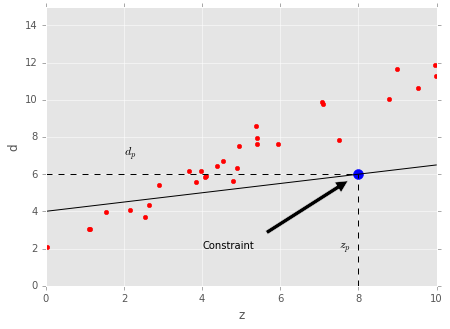

In [12]:
from numpy.linalg import inv

# constrained least squares to fit synthetic data

# z-axis
z = np.sort(np.random.uniform(0, 10, 30))
dobs = 2 + z + np.random.normal(0, 0.5, 30)

# constraining point
zp = 8
dp = 6

# constrained least squares fit
G = np.array([np.ones(30), z])
GTG = G.dot(np.transpose(G))
GTd = G.dot(dobs)
F = np.array([1, zp])

# build system matrix
A = np.zeros((3,3))
for i in range(0,2):
    A[i,2] = F[i]
    for j in range(0,2):
        A[i,j] = GTG[i,j]
        A[2,j] = F[j]

# build right vector
b = np.zeros(3)
for i in range(0, 2):
    b[i] = GTd[i]
b[2] = dp

# solve for model estimate and predict data
mest = inv(A).dot(b)
dpre = np.transpose(G).dot(mest[0:2])

# build figure
plt.subplots(1,1, figsize=(7,5))
ax = plt.subplot(111)

# single constraining data point
plt.scatter(zp, dp, color="blue", s=100)

# observed data points
plt.scatter(z, dobs, color="red")

# least squares solution and biconjugate gradient solution
plt.plot(z, dpre, color="black")

# graph annotation
ax.text(2, dp+1, r'$d_p$', fontsize=12)
ax.text(zp-0.5, 2, r'$z_p$', fontsize=12)
plt.plot([zp, zp], [0,dp], color="black", ls='dashed')
plt.plot([0, zp], [dp,dp], color="black", ls='dashed')
ax.annotate('Constraint', xy=(zp, dp), xytext=(4, 2), arrowprops=dict(facecolor='black', shrink=0.1),)

# graphing params
plt.xlim(0,10)
plt.ylim(0,15)
plt.xlabel('z')
plt.ylabel('d')

Another type of *a priori* constraint is the *linear inequality constraint*, which we can write as **Hm>=h** (the inequality being interpreted component by component).  Note that this form can also include <= inequalities by multiplying the inequality relation by -1.  This kind of *a priori* constraint has application to problems in which the model parameters are inherently positive quantities, $m_i > 0$, and to other cases when the solution is known to possess some kind of bounds.  One could therefore propose a new kind of constrained least squares solution of overdetermined problems, one that minimizes the error subject to the given inequality constraints.  *A priori* inequality constraints also have application to underdetermined problems.  One can find the smallest solution that solves both **Gm=d** and **Hm>=h**.  These problems can be solved in a straightforward fashion (Chapter 7).  

### 3.11 The variance of the model parameter estimates  

The data invariably contain noise that causes errors in the estimates of the model parameters.  We can calculate how this measurement error *maps* into errors in $\mathbf{m}^{\text{est}}$ by noting that all of the formulas derived above for estimates of the model parameters are linear functions of the data, of the form $\mathbf{m}^{\text{est}}=\mathbf{Md}+\mathbf{v}$, where **M** is some matrix and **v** some vector.  Therefore, if we assume that the data have a distribution characterized by some covariance matrix [cov **d**], the estimates of the model parameters have a distribution characterized by a covariance matrix $[\text{cov} \: \mathbf{m}] = \mathbf{M} [\text{cov} \: \mathbf{d}] \mathbf{M}^{\text{T}}$.  The covariance of the solution can therfore be calculated in a straightforward fashion.  If the data are uncorrelated and of equal variance $\sigma_d^2$, then very simple formulas are obtained for the covariance of some of the more simple inverse problem solutions.  

The simple least squares solution $\mathbf{m}^{\text{est}} = [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \mathbf{d}$ has covariance:  

\begin{equation*}
[\text{cov} \: \mathbf{m}] = \left[ [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \right] \sigma_d^2 \mathbf{I} \left[ [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} \mathbf{G}^{\text{T}} \right]^{\text{T}} = \sigma_d^2 [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1}\\
\end{equation*}  

and the simple minimum-length solution $\mathbf{m}^{\text{est}} = \mathbf{G}^{\text{T}}[\mathbf{GG}^{\text{T}}]^{-1} \mathbf{d}$ has covariance:  

\begin{equation*}
[\text{cov} \: \mathbf{m}] = \left[ \mathbf{G}^{\text{T}} [\mathbf{GG}^{\text{T}}]^{-1} \right] \sigma_d^2 \mathbf{I} \left[ \mathbf{G}^{\text{T}} [\mathbf{GG}^{\text{T}}]^{-1} \right]^{\text{T}} = \sigma_d^2 \mathbf{G}^{\text{T}} [\mathbf{GG}^{\text{T}}]^{-2} \mathbf{G}\\
\end{equation*}

An important issue is how to arrive at an estimate of the variance of the data $\sigma_d^2$ that can be used in these equations.  One possibility is to base it upon knowledge about the inherent accuracy of the measurement process, in which case it is termed an *a priori variance*.  For instance, if lengths are being measured with a ruler with 1 mm divisions, the estimate $\sigma_d \approx 1/2$ mm would be reasonable.  Another possibility is to base the estimate upon the size distribution of prediction errors **e** determined by fitting a model to the data, in which case it is termed an *a posterior* variance.  A reasonable estimate, whose theoretical justification will be discussed in Chapter 5, is:

\begin{equation*}
\sigma_d^2 \approx \frac{1}{N-M} \sum_{i=1}^N e_i^2\\
\end{equation*}

This formula is essentially the mean-squared error $N^{-1} \sum_{i=1}^N e_i^2$, except that *N* has been replaced by *N-M* to account for the ability of a model with *M* parameters to exactly fit *M* data.  A posterior estimates are usually overestimates because inaccuracies in the model contribute to the size of the prediction error.  

The least squares rule for error propagation, $[\text{cov} \: \mathbf{m}] = \sigma_d^2 [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1}$, indicates that the model parameters can be correlated and can be of unequal variance even when the data are uncorrelated and are of equal variance.  Whether observational error is attenuated or amplified by the inversion process is critically dependent upon the structure of the data kernel **G**.  In the problem for the mean of *N* data, discussed above, observational error is attenuated, but this desirable behavior is not common to all inverse problems.  

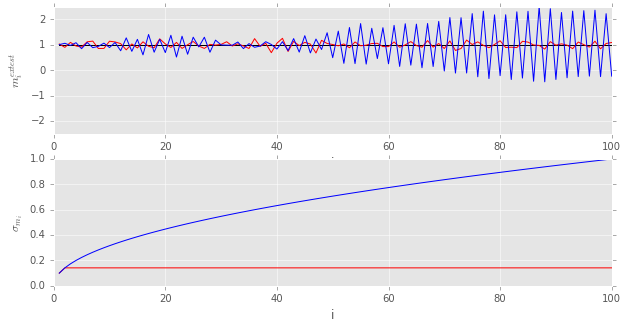

In [13]:
from scipy.linalg import toeplitz

# two hypothetical experiments to measure the weight m_i of each of 100 bricks
# EXPERIMENT 1: the bricks are accumulated on a scale so that data observation i is the sum of the weight of the first i bricks
# EXPERIMENT 2: the first brick is weighed, and then subsequent pairs of bricks are weighed (1st, 1st & 2nd, 2nd & 3rd, ...)

# build TRUE model
z = np.arange(100)+1
mtrue = np.ones(100)

# build system matrices (experiment 1 and 2)
G1 = toeplitz(np.ones(100), np.zeros(100))
G2 = toeplitz(np.array([1, 1, *np.zeros(100-2).tolist()]), np.array([1, *np.zeros(100-1).tolist()]))

# TRUE data observations (experiments 1 and 2)
d1true = G1.dot(mtrue)
d2true = G2.dot(mtrue)

# add Gaussian noise to the data (experiments 1 and 2)
d1obs = d1true + np.random.normal(0, 0.1, 100)
d2obs = d2true + np.random.normal(0, 0.1, 100)

# solve for model parameters (both experiments)
m1est = bicg(np.transpose(G1).dot(G1), np.transpose(G1).dot(d1obs))[0]
m2est = bicg(np.transpose(G2).dot(G2), np.transpose(G2).dot(d2obs))[0]

# calculate covariance matrices and corresponding error for each model parameter (experiments 1 adn 2)
C1 = 0.1**2 * inv(G1.transpose().dot(G1))
sm1 = np.power(C1.diagonal(), 0.5)
C2 = 0.1**2 * inv(G2.transpose().dot(G2))
sm2 = np.power(C2.diagonal(), 0.5)

# build figure
plt.subplots(2, 1, figsize=(10, 5))

plt.subplot(211)
plt.plot(z, mtrue, color='black')
plt.plot(z, m1est, color='red')
plt.plot(z, m2est, color='blue')
plt.xlim(0,100)
plt.ylim(-2.5, 2.5)
plt.xlabel('i')
plt.ylabel('$m_i^{\text{est}}$')

plt.subplot(212)
plt.plot(z, sm1, color='red')
plt.plot(z, sm2, color='blue')
plt.xlim(0,100)
plt.ylim(0, 1)
plt.xlabel('i')
plt.ylabel('$\sigma_{m_i}$')

### 3.12 Variance and prediction error of the least squares solution  

If the prediction error $E(\mathbf{m})=\mathbf{e}^{\text{T}} \mathbf{e}$ of an overdetermined problem has a very sharp minimum in the vicinity of the estimated solution $\mathbf{m}^{\text{est}}$, we would expect that the solution is well determined in the sense that it has small variance.  Small errors in determining the shape of *E*(**m**) due to random fluctuations in the data lead to only small errors in $\mathbf{m}^{\text{est}}$.  Conversely, if *E*(**m**) has a broad minimum, we expect that $\mathbf{m}^{\text{est}}$ has a large variance.  Since the curvature of a function is a measure of the sharpness of its minimum, we expect that the variance of the solution is related to the curvature of *E*(**m**) at its minimum, which in turn depends on the structure of the data kernel **G**.

EA min: 5.91725421208
EB min: 6.45050572418


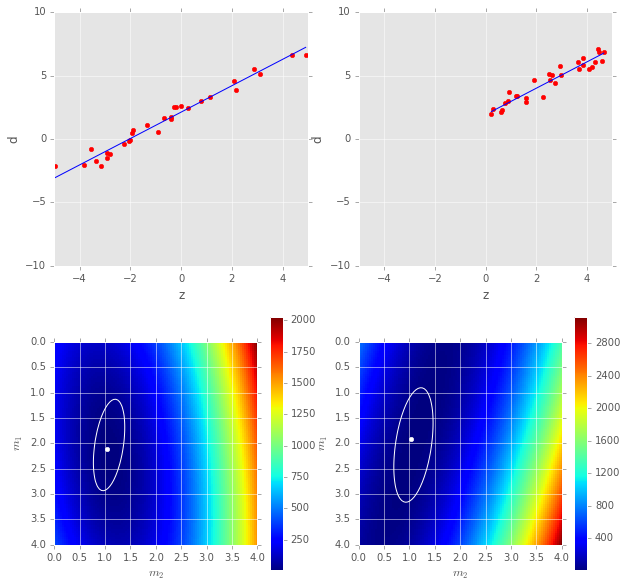

In [74]:
import matplotlib.cm as cm

# examine error surface of intercept and slope in a straight line fit to synthetic data

# z-axis
z = np.sort(np.random.uniform(-5,5,30))

# PART ONE: data evenly spread along interval
# d = a + bz + noise
dobs = 2 + 1 * z + np.random.normal(0, 0.51, 30)

# grid
a = np.arange(100)*4/100
b = np.arange(100)*4/100

# populate grid with errors
EA = np.zeros((100, 100))
for i in range(0,100):
    for j in range(0,100):
        ao = 4/100 * (i-1)
        bo = 4/100 * (j-1)
        dpre = ao + bo * z
        e = dobs - dpre
        EA[i,j] = e.transpose().dot(e)

# find minimum error
EAmin = np.min(EA)
print('EA min:', np.min(EA))
EAminRC = np.unravel_index(np.argmin(EA), EA.shape)
a1 = 4/100 * (EAminRC[0]-1)
b1 = 4/100 * (EAminRC[1]-1)
dpre = a1 + b1 * z

# calculate covariance
G = np.array([np.ones(30), z])
C1 = 0.51**2 * inv(G.transpose().dot(G))

# curvature of error surface
j=1
d2Eda2 = (EA[EAminRC[0]+j, EAminRC[1]] - 2*EA[EAminRC[0],EAminRC[1]] + EA[EAminRC[0]-j,EAminRC[1]]) / ((j * 4/100)**2)
d2Edb2 = (EA[EAminRC[0], EAminRC[1]+j] - 2*EA[EAminRC[0],EAminRC[1]] + EA[EAminRC[0],EAminRC[1]-j]) / ((j * 4/100)**2)
d2Edadb = (EA[EAminRC[0]+j, EAminRC[1]+j] - 
           EA[EAminRC[0]+j, EAminRC[1]-j] - 
           EA[EAminRC[0]-j, EAminRC[1]+j] + 
           EA[EAminRC[0]-j, EAminRC[1]-j]) / (4*j*4/100*j*4/100)
DA = np.zeros((2,2))
DA[0,0] = d2Eda2
DA[0,1] = d2Edadb
DA[1,0] = d2Edadb
DA[1,1] = d2Edb2
C2 = 0.51**2 * inv(DA/2)
deltaE = (np.max(EA) - np.min(EA)) /100

# build figure
plt.subplots(2, 2, figsize=(10, 10))

# PART ONE least squares fitting of straight line
plt.subplot(221)
plt.scatter(z, dobs, color='red')
plt.plot(z, dpre, color='blue')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.xlabel('z')
plt.ylabel('d')

# PART ONE error surface
plt.subplot(223)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(EA)
plt.imshow(EA, interpolation='nearest', extent=(0,4,4,0))
plt.contour(CS, hold='on', levels=[np.min(EA)+deltaE], colors='white', extent=(0,4,4,0))
plt.scatter(b1, a1, color='white')
plt.grid(True)
plt.colorbar(m)
plt.xlim(0,4)
plt.ylim(4,0)
plt.xlabel('$m_2$')
plt.ylabel('$m_1$')

# PART TWO: data bunched up at end of interval

# z-axis
z = np.sort(np.random.uniform(-5+1*10/2, 5, 30))

# d = a + bz + noise
dobs = 2 + 1 * z + np.random.normal(0, 0.51, 30)

# grid
a = np.arange(100)*4/100
b = np.arange(100)*4/100

# populate grid with errors
EB = np.zeros((100, 100))
for i in range(0,100):
    for j in range(0,100):
        ao = 4/100 * (i-1)
        bo = 4/100 * (j-1)
        dpre = ao + bo * z
        e = dobs - dpre
        EB[i,j] = e.transpose().dot(e)
        
# find minimum error
EBmin = np.min(EB)
print('EB min:', np.min(EB))
EBminRC = np.unravel_index(np.argmin(EB), EB.shape)
a1 = 4/100 * (EBminRC[0]-1)
b1 = 4/100 * (EBminRC[1]-1)
dpre = a1 + b1 * z

# calculate covariance
G = np.array([np.ones(30), z])
C1 = 0.51**2 * inv(G.transpose().dot(G))

# curvature of error surface
j=1
d2Eda2 = (EB[EBminRC[0]+j, EBminRC[1]] - 2*EB[EBminRC[0],EBminRC[1]] + EB[EBminRC[0]-j,EBminRC[1]]) / ((j * 4/100)**2)
d2Edb2 = (EB[EBminRC[0], EBminRC[1]+j] - 2*EB[EBminRC[0],EBminRC[1]] + EB[EBminRC[0],EBminRC[1]-j]) / ((j * 4/100)**2)
d2Edadb = (EB[EBminRC[0]+j, EBminRC[1]+j] - 
           EB[EBminRC[0]+j, EBminRC[1]-j] - 
           EB[EBminRC[0]-j, EBminRC[1]+j] + 
           EB[EBminRC[0]-j, EBminRC[1]-j]) / (4*j*4/100*j*4/100)
DB = np.zeros((2,2))
DB[0,0] = d2Eda2
DB[0,1] = d2Edadb
DB[1,0] = d2Edadb
DB[1,1] = d2Edb2
C2 = 0.51**2 * inv(DB/2)
deltaE = (np.max(EB) - np.min(EB)) /100

# PART ONE least squares fitting of straight line
plt.subplot(222)
plt.scatter(z, dobs, color='red')
plt.plot(z, dpre, color='blue')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.xlabel('z')
plt.ylabel('d')

# PART ONE error surface
plt.subplot(224)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(EB)
plt.imshow(EB, interpolation='nearest', extent=(0,4,4,0))
plt.contour(CS, hold='on', levels=[np.min(EB)+deltaE], colors='white', extent=(0,4,4,0))
plt.scatter(b1, a1, color='white')
plt.grid(True)
plt.colorbar(m)
plt.xlim(0,4)
plt.ylim(4,0)
plt.xlabel('$m_2$')
plt.ylabel('$m_1$')

The curvature of the prediction error can be measured by its second derivative, as we can see by computing how small changes in the model parameters change the prediction error.  Expanding the prediction error in a Taylor series about its minimum and keeping up to second-order terms gives:  

\begin{equation*}
\Delta E = E(\mathbf{m}) - E(\mathbf{m}^{\text{est}}) = [\mathbf{m}-\mathbf{m}^{\text{est}}]^{\text{T}} \left[ \frac{1}{2} \frac{\partial^2 E}{\partial \mathbf{m}^2} \right]_{\mathbf{m}=\mathbf{m}^{\text{est}}} [\mathbf{m}-\mathbf{m}^{\text{est}}]\\
\end{equation*}

Here the matrix $\frac{\partial^2 E}{\partial \mathbf{m}^2}$ has elements $\frac{\partial^2 E}{\partial m_i \partial m_j}$.  Note that the first-order term is zero, since the expansion is made at a minimum.  The second derivative can also be computed directly from the expression:  

\begin{equation*}
E(\mathbf{m})= \| \mathbf{d} - \mathbf{Gm} \|_2^2 = \sum_{i=1}^N d_i^2 - 2 \sum_{i=1}^N d_i \sum_{j=1}^M G_{ij} m_j + \sum_{i=1}^N \sum_{j=1}^M G_{ij} m_j \sum_{k=1}^M G_{ik} m_k\\
\end{equation*}  

which gives:  

\begin{equation*}
\frac{\partial^2 E}{\partial m_p \partial m_q} = 2 \sum_{i=1}^N \sum_{j=1}^M G_{ij} \frac{\partial m_j}{\partial m_p} \sum_{k=1}^M G_{ik} \frac{\partial m_k}{\partial m_q} = 2 \sum_{i=1}^N G_{ip} G_{iq}
\qquad \text{or} \qquad \left[ \frac{1}{2} \frac{\partial^2 E}{\partial \mathbf{m}^2} \right] = \mathbf{G}^{\text{T}} \mathbf{G}\\
\end{equation*}  

The covariance of the least squares solution (assuming uncorrelate4d data all with equal variance $\sigma_d^2$) is therefore:

\begin{equation*}
[\text{cov} \: \mathbf{m}] = \sigma_d^2 [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} = \sigma_d^2 \left[ \frac{1}{2} \frac{\partial^2 E}{\partial \mathbf{m}^2} \right]^{-1}_{\mathbf{m}=\mathbf{m}^{\text{est}}}\\
\end{equation*}

The prediction error $E=\mathbf{e}^{\text{T}} \mathbf{e}$ is the sum of squares of Gaussian data minus a constant.  It is, therefore, a random variable with a $\chi^2$ distribution with *N-M* degrees of freedom, which has mean $(N-M)\sigma_d^2$ and variance $2(N-M)\sigma_d^4$.  (The degrees of freedom are reduced by *M* since the model can force *M* linear combinations of the $e_i$ to zero.)  We can use the standard deviation of *E*:

\begin{equation*}
\sigma_E = [2(N-M)]^{1/2} \sigma_d^2\\
\end{equation*}

in the expression for variance as:  

\begin{equation*}
[\text{cov} \: \mathbf{m}] = \sigma_d^2 [\mathbf{G}^{\text{T}} \mathbf{G}]^{-1} = \frac{\sigma_E}{[2(N-M)]^{1/2}} \left[ \frac{1}{2} \frac{\partial^2 E}{\partial \mathbf{m}^2} \right]^{-1}_{\mathbf{m}=\mathbf{m}^{\text{est}}}\\
\end{equation*}  

The covariance $[\text{cov} \: \mathbf{m}]$ can be interpreted as being controlled either by the variance of the data times a measure of how error in the data is mapped into error in the model parameters or by the standard deviation of the total prediction error times a measure of the curvature of the prediction error at its minimum.  

The methods of solving inverse problems that have been discussed in this chapter emphasize the data and model parameters themselves.  The method of least squares estimates the model parameters with smallest prediction length.  The method of minimum-length estimates the simplest model parameters.  The ideas of data nad model parameters are very concrete and straightforward, and the methods based on them are simple and easily understood.  Nevertheless, this viewpoint tends to obscure an important aspect of inverse problems: that the nature of the problems depends more on the *relationship* between the data nad model parameters than on the data or model parameters themselves.  It should, for instance, be possible to tell a well-designed experiment from a poor one without knowing what numerical values of the data or model parameters are, or even the range in which they fall.  In the next chapter, we will begin to explore this kind of problem.

### End of chapter